In [1]:
import os
dir = os.getcwd()
dir

import pandas as pd
csv_name = 'csv_agileoutgoing_C_London'

csv_list = 'csv_agileoutgoing_C_London.csv'

csv_path = os.path.join(dir, 'data',csv_list)
csv_name= pd.read_csv(csv_path)


In [2]:
csv_agileoutgoing_C_London = pd.read_csv(os.path.join(dir, 'data',csv_list))

In [3]:
column_names=['date_time', 'time', 'Letter', 'City', 'Price']
csv_agileoutgoing_C_London.columns = column_names
csv_agileoutgoing_C_London.head()

,date_time,time,Letter,City,Price
0,2019-05-15 23:30:00+00:00,00:30,C,London,4.24
1,2019-05-16 00:00:00+00:00,01:00,C,London,4.24
2,2019-05-16 00:30:00+00:00,01:30,C,London,4.24
3,2019-05-16 01:00:00+00:00,02:00,C,London,4.24
4,2019-05-16 01:30:00+00:00,02:30,C,London,4.24


In [4]:
csv_agileoutgoing_C_London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84671 entries, 0 to 84670
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  84671 non-null  object 
 1   time       84671 non-null  object 
 2   Letter     84671 non-null  object 
 3   City       84671 non-null  object 
 4   Price      84671 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.2+ MB


In [5]:
df_agileoutgoing_C_London = pd.DataFrame(csv_agileoutgoing_C_London[['date_time', 'Price']])
df_agileoutgoing_C_London.columns = ['ds', 'y']
df_agileoutgoing_C_London.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84671 entries, 0 to 84670
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      84671 non-null  object 
 1   y       84671 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [6]:
df_agileoutgoing_C_London['ds'] = df_agileoutgoing_C_London['ds'].str.slice(stop=-6)

In [7]:
# Assuming 'ds' column has timezone information
# df_agileoutgoing_C_London['ds'] = df_agileoutgoing_C_London['ds'].dt.tz_localize(None)

# Now, convert 'ds' column to datetime without timezone
df_agileoutgoing_C_London['ds'] = pd.to_datetime(df_agileoutgoing_C_London['ds'], format='%Y-%m-%d %H:%M:%S')

In [8]:
df_agileoutgoing_C_London.head()

,ds,y
0,2019-05-15 23:30:00,4.24
1,2019-05-16 00:00:00,4.24
2,2019-05-16 00:30:00,4.24
3,2019-05-16 01:00:00,4.24
4,2019-05-16 01:30:00,4.24


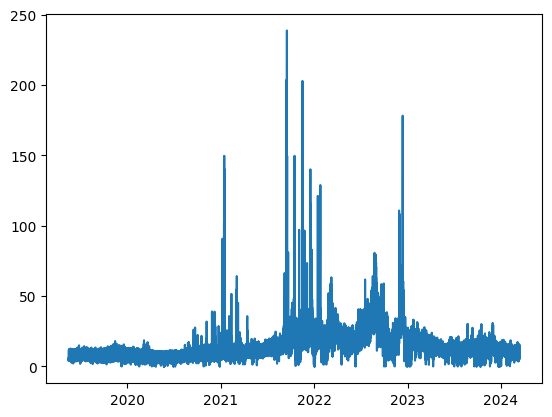

In [9]:
import matplotlib.pyplot as plt

plt.plot(df_agileoutgoing_C_London['ds'], df_agileoutgoing_C_London['y'])
plt.show()

In [10]:
df = df_agileoutgoing_C_London[df_agileoutgoing_C_London['ds']<'2020-07-01 00:00:00']

In [11]:
df.head()

,ds,y
0,2019-05-15 23:30:00,4.24
1,2019-05-16 00:00:00,4.24
2,2019-05-16 00:30:00,4.24
3,2019-05-16 01:00:00,4.24
4,2019-05-16 01:30:00,4.24


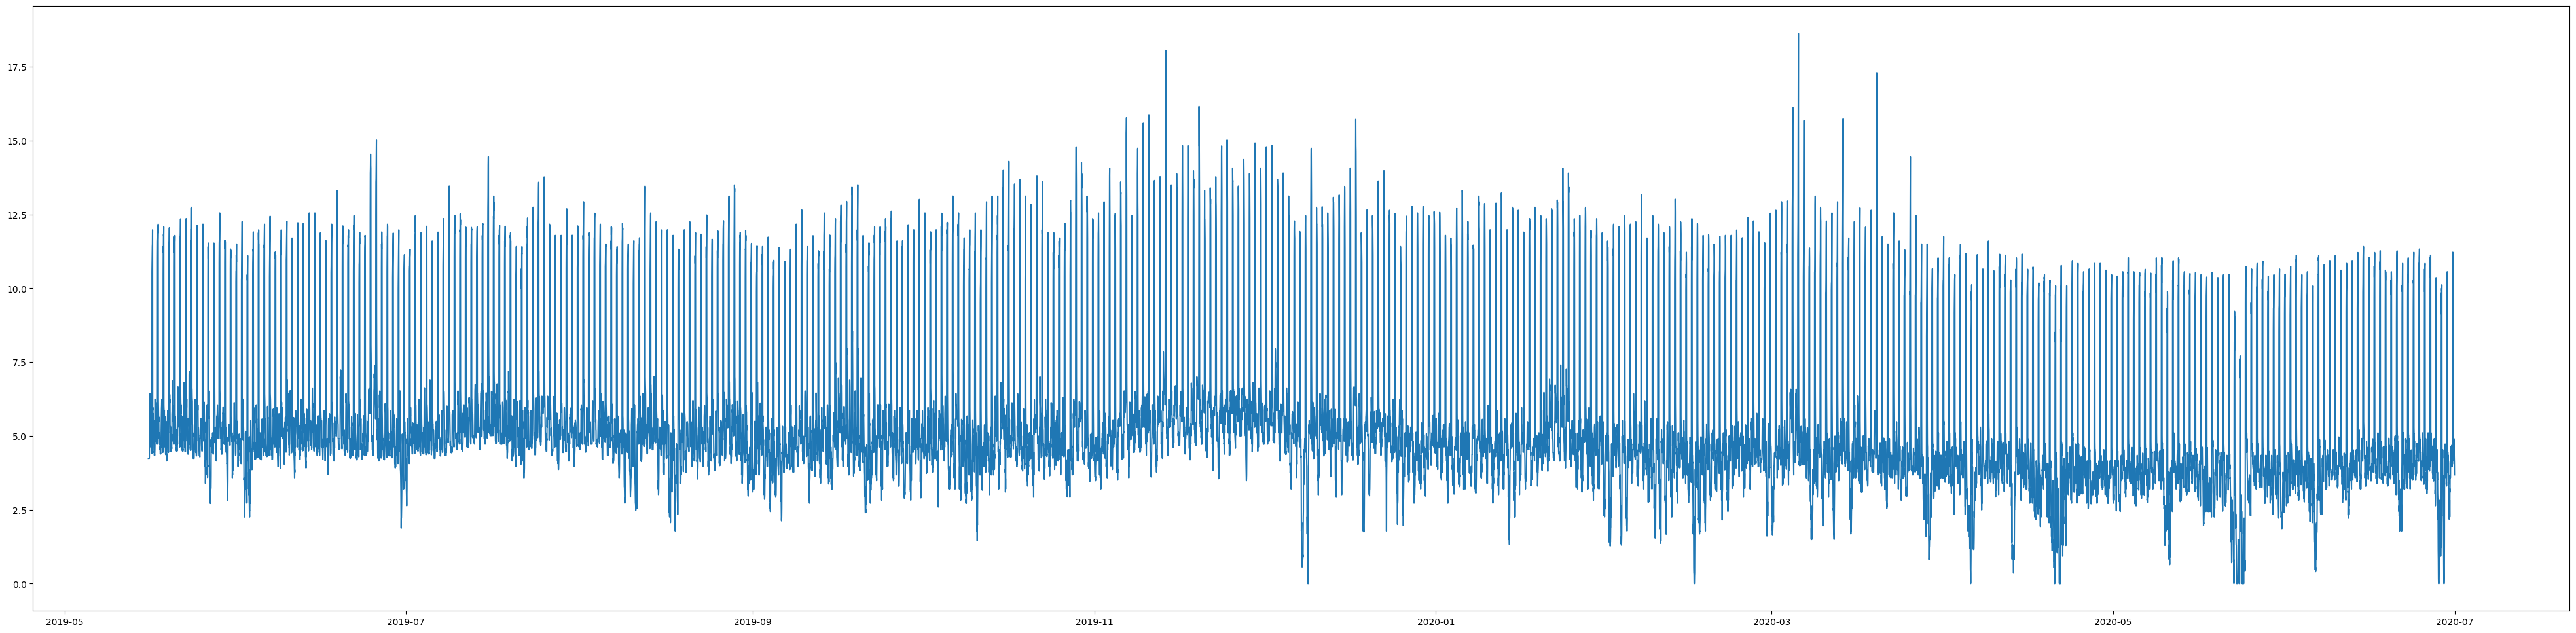

In [12]:
plt.figure(figsize=(50,12))
plt.plot(df['ds'], df['y'])
plt.show()

In [13]:
df['ds'][:10]

0   2019-05-15 23:30:00
1   2019-05-16 00:00:00
2   2019-05-16 00:30:00
3   2019-05-16 01:00:00
4   2019-05-16 01:30:00
5   2019-05-16 02:00:00
6   2019-05-16 02:30:00
7   2019-05-16 03:00:00
8   2019-05-16 03:30:00
9   2019-05-16 04:00:00
Name: ds, dtype: datetime64[ns]

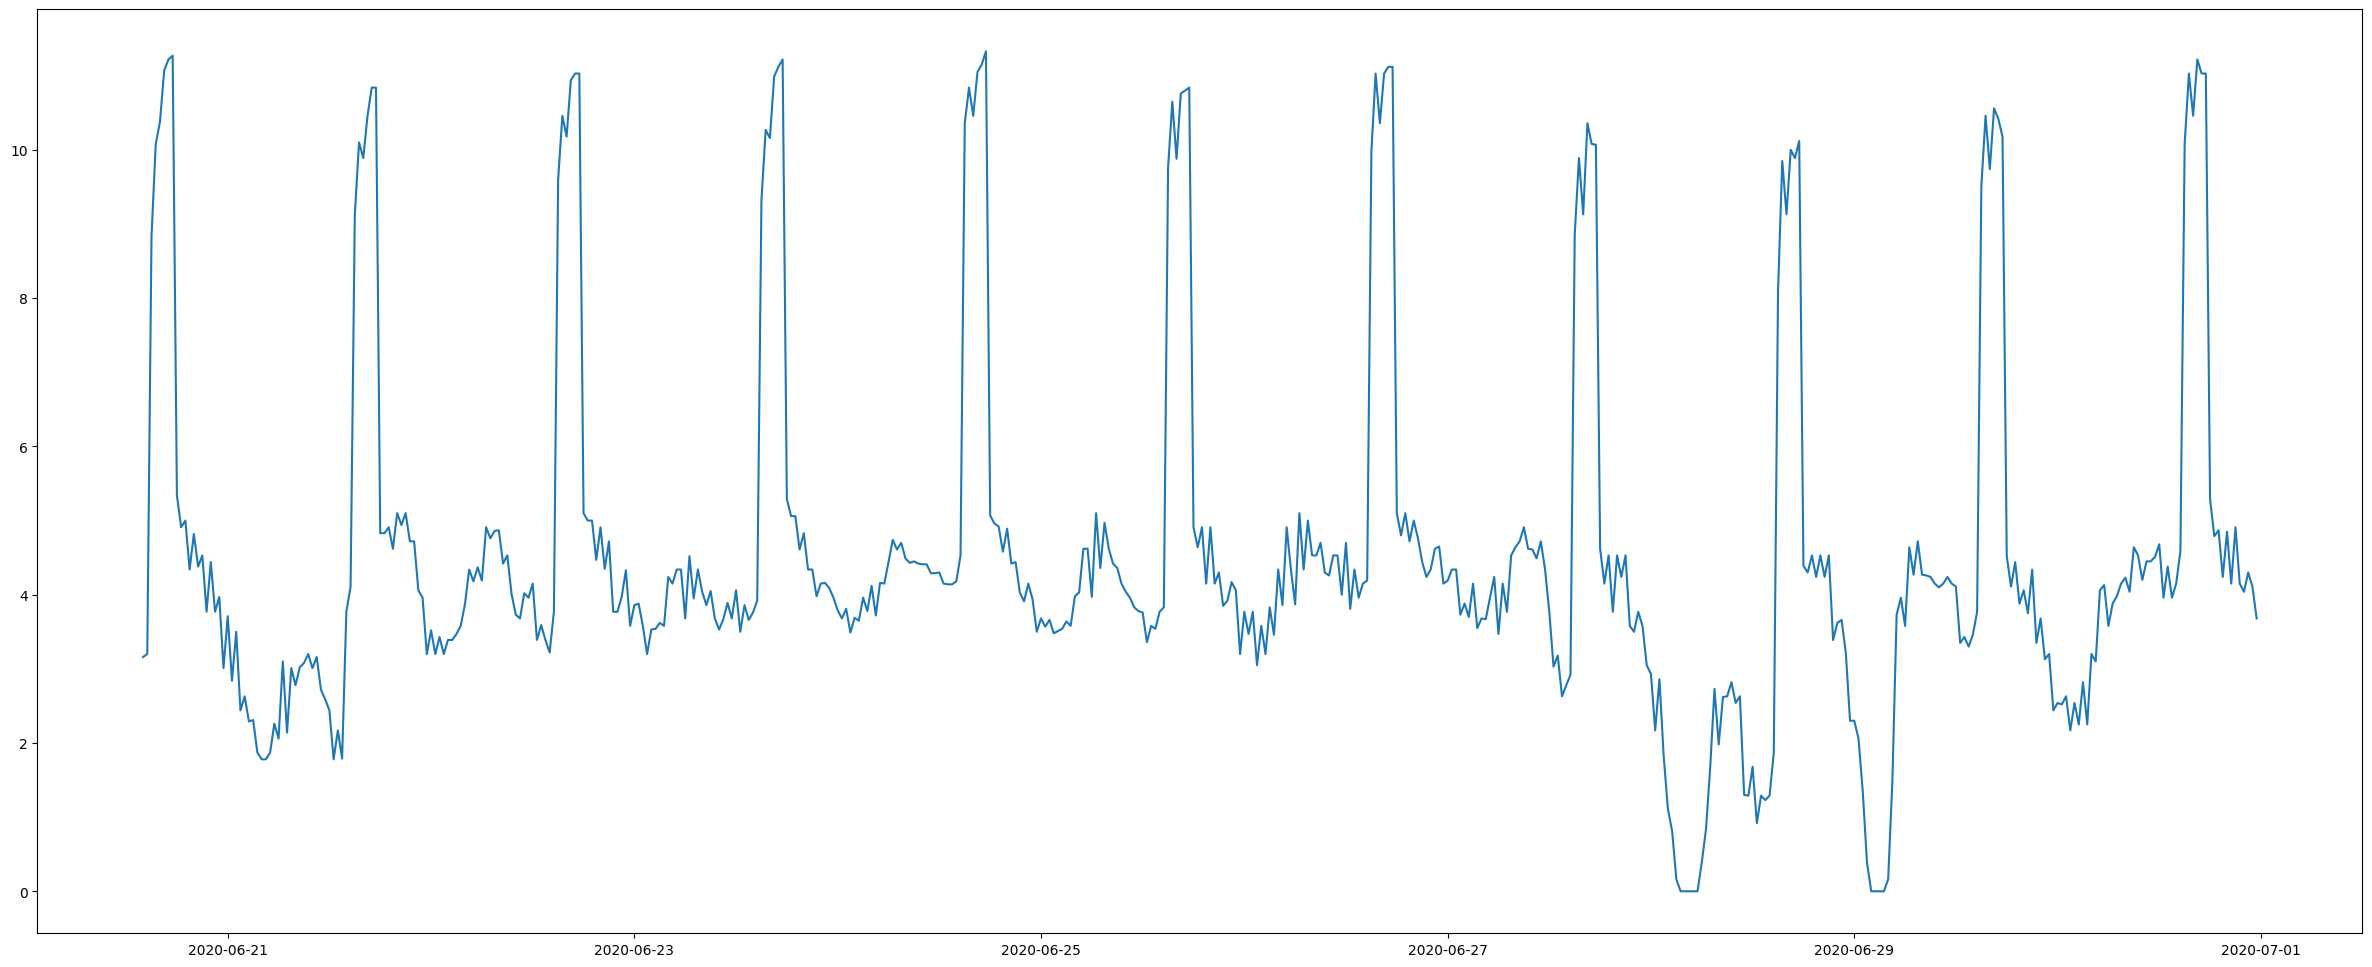

In [14]:
plt.figure(figsize=(30,12))
plt.plot(df['ds'][-500:], df['y'][-500:])
plt.show()

In [15]:
import numpy as np

In [16]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [17]:
split_ratio = round(df.shape[0]*0.9)
split_ratio, df.shape

(17799, (19777, 2))

In [18]:
train = df.iloc[:split_ratio]
test = df.iloc[split_ratio:]

check = len(train)+len(test)
check

19777

In [19]:
train['ds'][0]- train['ds'][len(train)-1]

Timedelta('-371 days +05:00:00')

In [20]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

16:27:40 - cmdstanpy - INFO - Chain [1] start processing
16:27:42 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
horizon = 24*90

future = model.make_future_dataframe(periods = horizon, freq='30min')

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
19954,2020-07-04 16:30:00,7.228109,4.234718,10.066929
19955,2020-07-04 17:00:00,7.332492,4.360023,10.049751
19956,2020-07-04 17:30:00,7.055488,4.341764,9.784418
19957,2020-07-04 18:00:00,6.449619,3.508440,9.194699
19958,2020-07-04 18:30:00,5.622696,2.776653,8.430552


/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


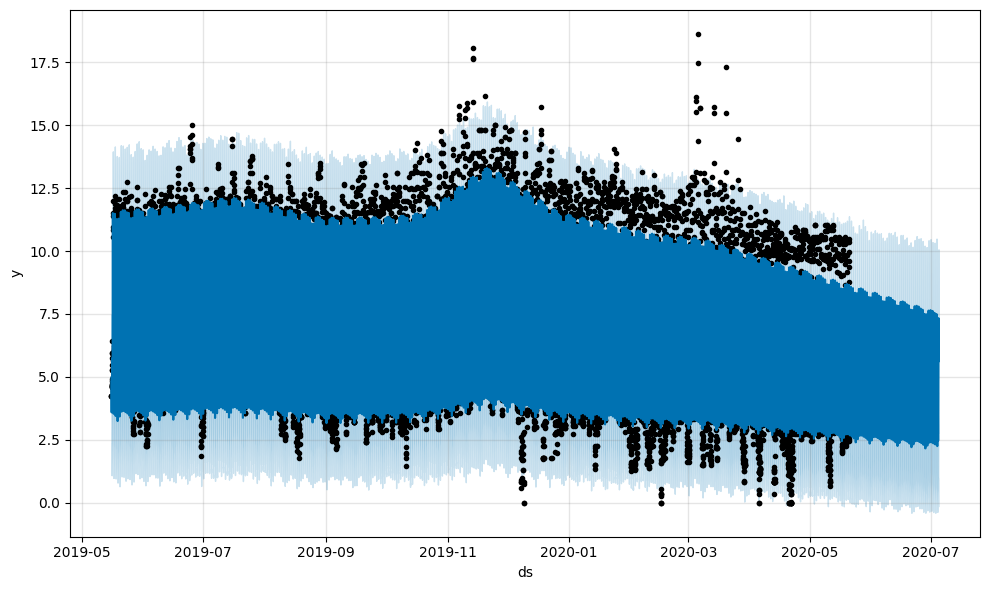

In [68]:
ax = model.plot(forecast)

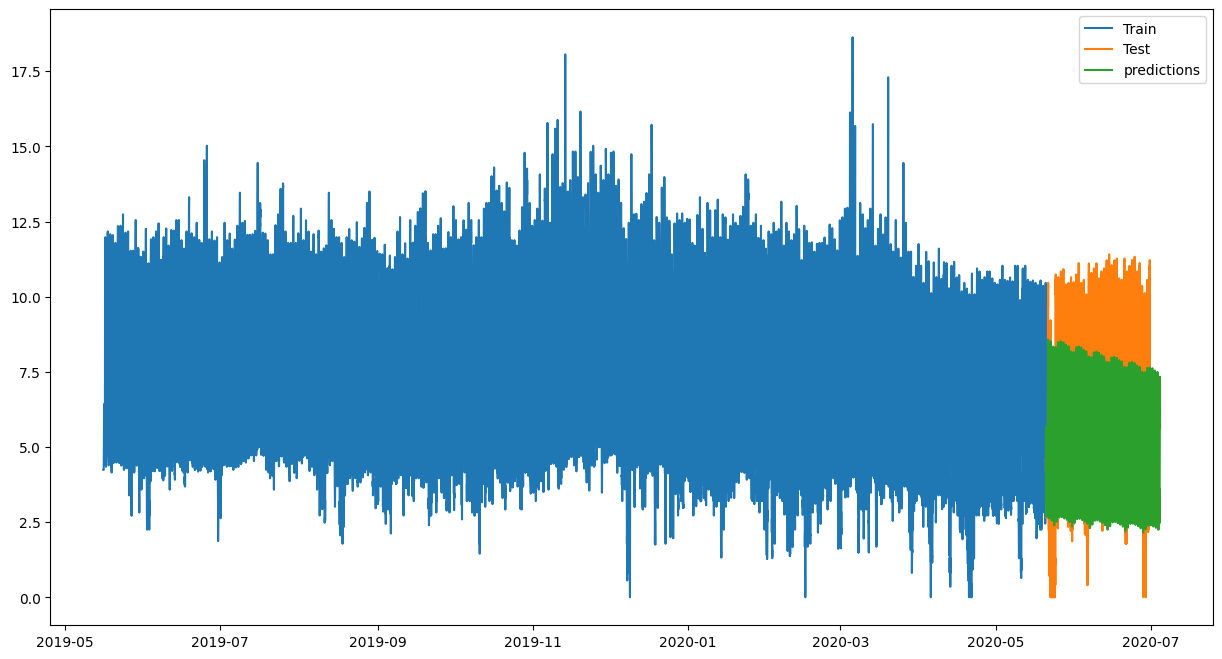

In [69]:
plt.figure(figsize=(15,8))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label='predictions')
plt.legend(loc='best')
plt.show()

In [119]:
df.shape

(19777, 2)

In [88]:
from datetime import timedelta
train['ds'][0] - train['ds'][len(train)-1], train['ds'][0], train['ds'][0]+ timedelta(days=1)

train.tail()

,ds,y
17794,2020-05-20 16:30:00,9.98
17795,2020-05-20 17:00:00,10.37
17796,2020-05-20 17:30:00,10.46
17797,2020-05-20 18:00:00,4.85
17798,2020-05-20 18:30:00,4.72


In [98]:
forecast['ds'].tail()

19954   2020-07-04 16:30:00
19955   2020-07-04 17:00:00
19956   2020-07-04 17:30:00
19957   2020-07-04 18:00:00
19958   2020-07-04 18:30:00
Name: ds, dtype: datetime64[ns]

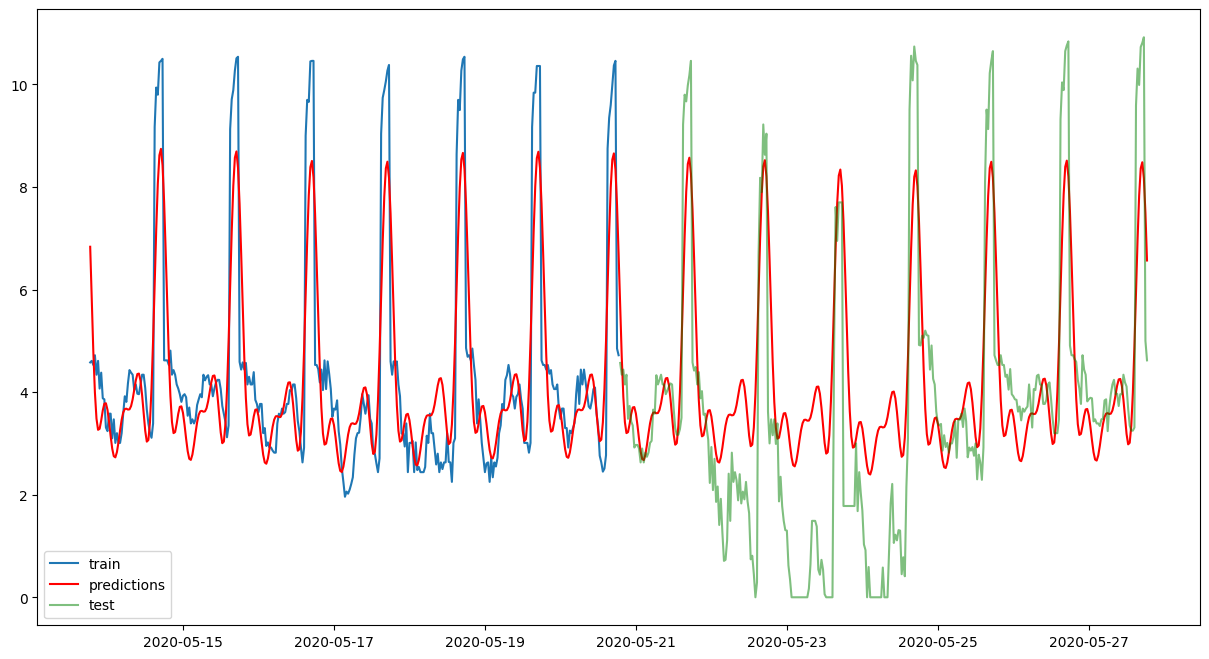

In [114]:
days =7

date = train['ds'][len(train)-1]- timedelta(days=days)
date_end = date + timedelta(days=14)
# date
train_date=train.loc[train['ds'] >= date ].copy()
forecast_date=forecast.loc[(forecast['ds'] >= date ) & (forecast['ds'] <= date_end)].copy()
test_date=test.loc[test['ds'] <= date_end ].copy()

# train_date.head()
plt.figure(figsize=(15,8))
plt.plot(train_date['ds'], train_date['y'], label='train')
plt.plot(forecast_date['ds'], forecast_date['yhat'], label='predictions', color = 'red')
plt.plot(test_date['ds'], test_date['y'], label='test', color = 'green', alpha =0.5)
plt.legend(loc='best')

/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version thi

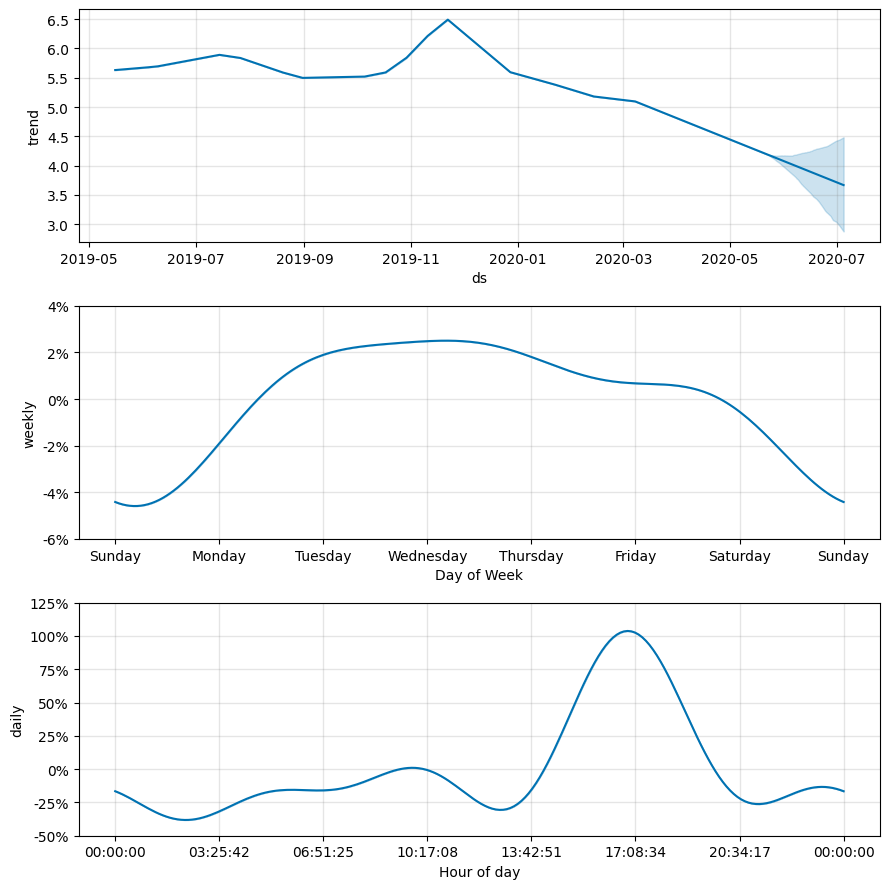

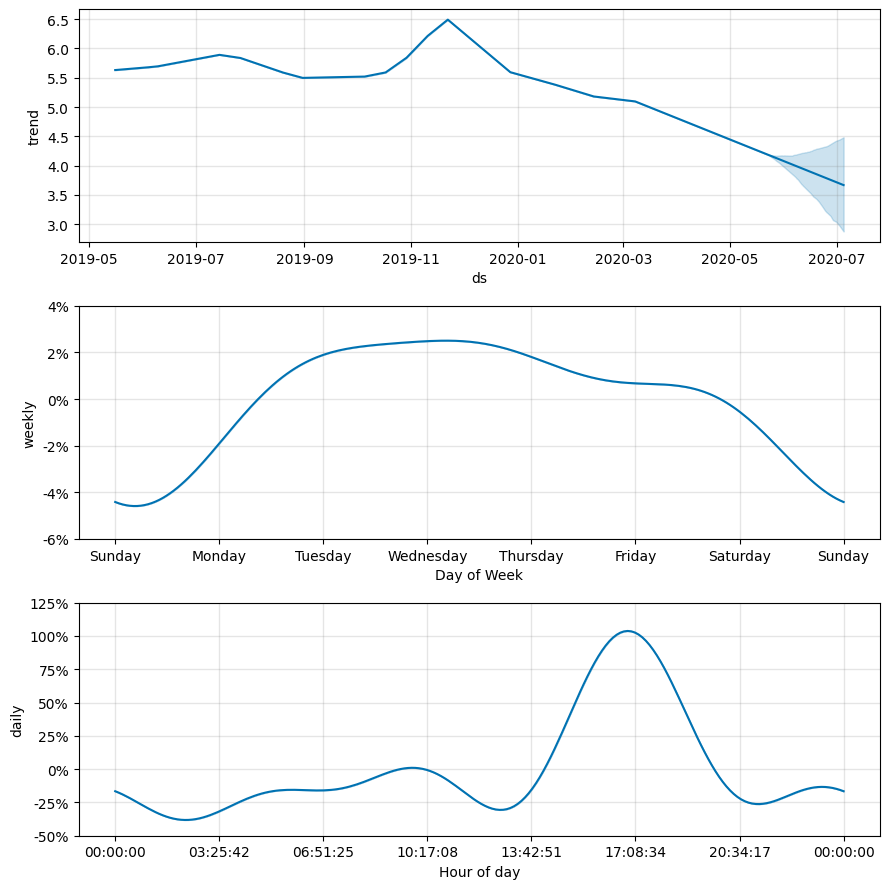

In [70]:
model.plot_components(forecast)

In [71]:
model

In [72]:
df_cv = cross_validation(model = model, initial='180 days', horizon='30 days', period='3 days')

df_p = performance_metrics(df_cv)

  0%|          | 0/54 [00:00<?, ?it/s]16:54:18 - cmdstanpy - INFO - Chain [1] start processing
16:54:19 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 1/54 [00:00<00:47,  1.11it/s]16:54:19 - cmdstanpy - INFO - Chain [1] start processing
16:54:20 - cmdstanpy - INFO - Chain [1] done processing
  4%|▎         | 2/54 [00:01<00:50,  1.03it/s]16:54:20 - cmdstanpy - INFO - Chain [1] start processing
16:54:21 - cmdstanpy - INFO - Chain [1] done processing
  6%|▌         | 3/54 [00:02<00:44,  1.15it/s]16:54:21 - cmdstanpy - INFO - Chain [1] start processing
16:54:22 - cmdstanpy - INFO - Chain [1] done processing
  7%|▋         | 4/54 [00:03<00:43,  1.15it/s]16:54:22 - cmdstanpy - INFO - Chain [1] start processing
16:54:23 - cmdstanpy - INFO - Chain [1] done processing
  9%|▉         | 5/54 [00:04<00:43,  1.13it/s]16:54:23 - cmdstanpy - INFO - Chain [1] start processing
16:54:23 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 6/54 [00:05<00:43,  1.10it/s]16:54:24

In [115]:
df_p

,horizon,mse,rmse,mae,mdape,smape,coverage
0,3 days 00:00:00,2.212884,1.487577,1.043482,0.142041,0.207074,0.894933
1,3 days 00:30:00,2.213398,1.487749,1.043521,0.141991,0.207087,0.894933
2,3 days 01:00:00,2.213620,1.487824,1.043584,0.142011,0.207102,0.894933
3,3 days 01:30:00,2.213660,1.487837,1.043703,0.142083,0.207137,0.894933
4,3 days 02:00:00,2.213652,1.487835,1.043698,0.142148,0.207147,0.894933
...,...,...,...,...,...,...,...
1292,29 days 22:00:00,2.782665,1.668132,1.183622,0.171009,0.235548,0.873457
1293,29 days 22:30:00,2.783650,1.668427,1.183734,0.170961,0.235563,0.873200
1294,29 days 23:00:00,2.784535,1.668693,1.184160,0.170961,0.235604,0.872685
1295,29 days 23:30:00,2.785998,1.669131,1.184607,0.170961,0.235672,0.872814


In [116]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-11-13 19:00:00,7.284230,5.124344,9.507639,9.09,2019-11-13 18:30:00
1,2019-11-13 19:30:00,6.079584,4.094280,8.340471,7.48,2019-11-13 18:30:00
2,2019-11-13 20:00:00,5.251804,2.999273,7.589462,7.00,2019-11-13 18:30:00
3,2019-11-13 20:30:00,4.843722,2.808201,7.117801,6.29,2019-11-13 18:30:00
4,2019-11-13 21:00:00,4.803341,2.646398,6.820451,6.62,2019-11-13 18:30:00


In [117]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
77755,2020-05-20 16:30:00,8.487668,5.683899,11.046407,9.98,2020-04-20 18:30:00
77756,2020-05-20 17:00:00,8.631300,5.954933,11.236063,10.37,2020-04-20 18:30:00
77757,2020-05-20 17:30:00,8.340446,5.510499,10.917236,10.46,2020-04-20 18:30:00
77758,2020-05-20 18:00:00,7.670363,4.968248,10.397249,4.85,2020-04-20 18:30:00
77759,2020-05-20 18:30:00,6.740286,4.206352,9.288879,4.72,2020-04-20 18:30:00


/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


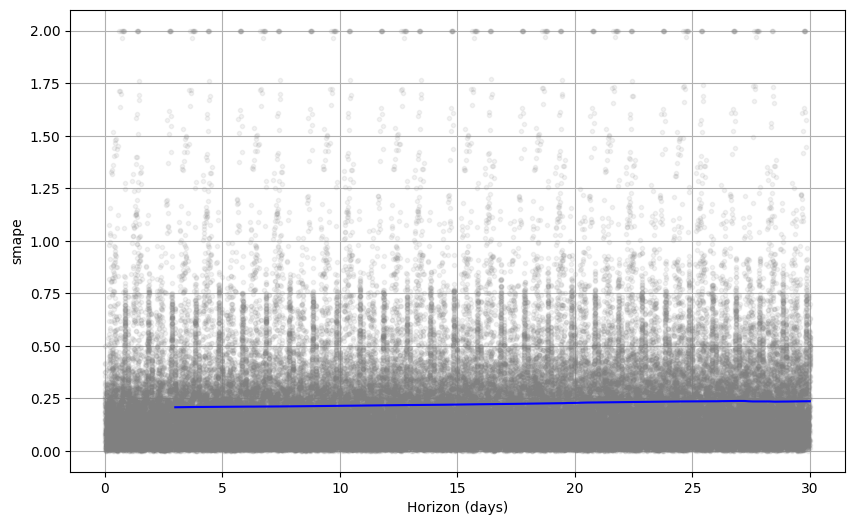

In [118]:
plot_cross_validation_metric(df_cv, metric='smape');

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [32]:
df.head()

,ds,y
0,2019-05-15 23:30:00,4.24
1,2019-05-16 00:00:00,4.24
2,2019-05-16 00:30:00,4.24
3,2019-05-16 01:00:00,4.24
4,2019-05-16 01:30:00,4.24


In [33]:
df_index=df.copy()
df_index.set_index('ds', inplace=True)

In [58]:
df_index.head()

,y
ds,
2019-05-15 23:30:00,4.24
2019-05-16 00:00:00,4.24
2019-05-16 00:30:00,4.24
2019-05-16 01:00:00,4.24
2019-05-16 01:30:00,4.24


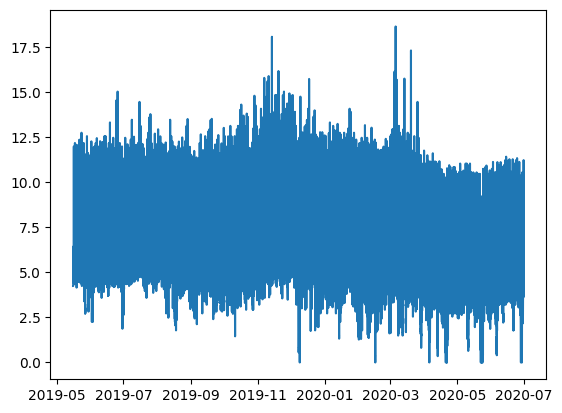

In [50]:
plt.plot(df_index)

# plt.plot(

# df['ds']['2019']

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19777 entries, 0 to 19776
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      19777 non-null  datetime64[ns]
 1   y       19777 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 463.5 KB


In [61]:
date1 = df_index.index[0]
date1

Timestamp('2019-05-15 23:30:00')

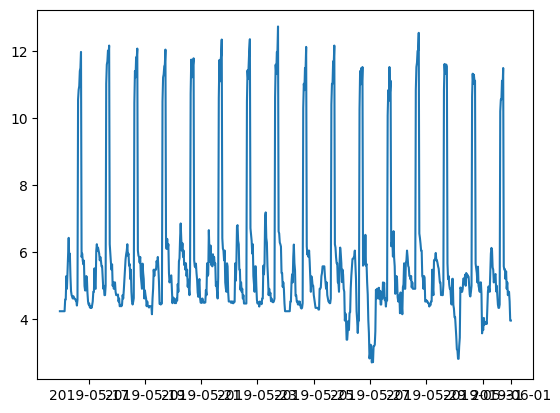

In [63]:
date = '2019-06-01'

df_date=df_index.loc[df_index.index <= date ].copy()
plt.plot(df_date)


# df_date.tail()

# df_index.set_index('ds', inplace=True)

In [ ]:
Prophet(growth = 'linear', changepoints = None, n_changepoints= 25, changepoint_range= 0.8, yearly_seasonality= 'auto', weekly_seasonality= 'auto',
        daily_seasonality= 'auto', holidays: Any | None = None, seasonality_mode: str = 'additive', seasonality_prior_scale: float = 10, holidays_prior_scale: float = 10,
        changepoint_prior_scale: float = 0.05, mcmc_samples: int = 0, interval_width: float = 0.8, uncertainty_samples: int = 1000, stan_backend: Any | None = None,
        scaling: str = 'absmax', holidays_mode: Any | None = None)

In [ ]:
df_index.index = pd.to_datetime(df_index.index)
df_index = df_index.asfreq('30T')


In [ ]:
# Now, you can run seasonal decomposition
result_add = seasonal_decompose(df_index['y'], model='additive')
result_add.plot();